# Sentiment Analysis

**Sentiment analysis** adalah proses penggunaan text analytics untuk mendapatkan berbagai sumber data dari internet dan beragam platform media sosial. Tujuannya adalah untuk memperoleh opini dari pengguna yang terdapat pada platform tersebut.

**Sentiment analysis** merupakan salah satu bidang dari Natural Languange Processing (NLP) yang membangun sistem untuk mengenali dan mengekstraksi opini dalam bentuk teks.

Pada case ini akan dilakukan Sentiment Analysis menggunakan data twitter.

Data tersebut berisi:
- **text** : 'tweet' orang di twitter
- **target** : Jenis sentiment analysis dari tweet tersebut (0: Negative Sentiment, 1: Positive Sentiment)


## Outline:
    
- Import Library
- Import Data
- Data Pre-processing
- WordCloud
- Feature Extraction
- Modeling
- Conclusion

## Import Libraries

In [369]:
#import libraries
import pandas as pd 
import numpy as np

#import Random sampling
import random

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

#Modeling
#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

In [0]:
data=pd.read_csv('clean_tweet.csv')

## Data Exploration

**Informasi ukuran dimensi data**

In [371]:
data.shape

(1600000, 2)

Dari informasi diatas, terlihat bahwa ukuran data 'tweet' terdiri dari 1.600.000 baris serta dua feature(variable) yaitu feature **text** yang terdiri atas tweet netizen dan feature **target** yang berisi hasil jenis sentiment tweet netizen (0: negative, 1: positive).

#### Convert target to string

**Mengubah kolom 'target' menjadi string (0= Negative, 1: Positive) untuk mempermudah dalam explorasi data.**

In [372]:
data['target'][data['target']==1]='positive'
data['target'][data['target']==0]='negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Melihat 5 data teratas**

In [373]:
data.head()

,text,target
0,awww that s a bummer you shoulda got david car...,negative
1,is upset that he can t update his facebook by ...,negative
2,i dived many times for the ball managed to sav...,negative
3,my whole body feels itchy and like its on fire,negative
4,no it s not behaving at all i m mad why am i h...,negative


**Melihat 5 data terbawah**

In [374]:
data.tail()

,text,target
1599995,just woke up having no school is the best feel...,positive
1599996,thewdb com very cool to hear old walt intervie...,positive
1599997,are you ready for your mojo makeover ask me fo...,positive
1599998,happy th birthday to my boo of alll time tupac...,positive
1599999,happy charitytuesday,positive


**Informasi tipe data untuk setiap feature**

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null object
dtypes: object(2)
memory usage: 24.4+ MB


Dari hasil diatas, didapatkan informasi tentang tipe data untuk setiap feature dimana kedua feature memiliki tipe data string(kata).

#### Missing Values

**Checking Missing Values**

**Mengecek apakah terdapat missing values pada data 'tweet'**

In [376]:
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

text      3247
target       0
dtype: int64

Dari data tersebut terdapat missing values dari kolom 'text' sebanyak 3247. Maka, untuk langkah selanjutnya dilakukan penghapusan missing values tersebut.

**Handle missing Value**

Penanganan missing values dilakukan dengan menghapus baris data yang mengandung missing values, karena keberadaan missing values dapat mengakibatkan bias pada data sehingga perlu dihapus.

In [0]:
data= data.dropna()

**Melakukan checking missing value kembali setelah dilakukan penghapusan missing values**

In [378]:
# Checking number of missing values each variables

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

target    0
text      0
dtype: int64

target    0
text      0
dtype: int64

Ternyata, terbukti bahwa sudah tidak ada missing values pada data.

**Mengecek kembali ukuran data setelah dilakukan penghapusan missing values**

In [379]:
data.shape

(1596753, 2)

(1596753, 2)

Setelah dilakukan missing values, ukuran data menjadi 1.596753 baris dengan 2 features.

#### Visualization

In [0]:
#count sentiment 
sentiment = data.groupby(['target'])['target'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['target']
chart.drop(['target'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()

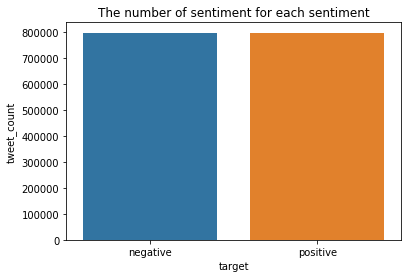

In [386]:
#make a barchar
ax = sns.barplot(x= 'target', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each sentiment') 

(-1.1154236238431436,
 1.2556590652652153,
 -1.116668849341659,
 1.2815710061969938)

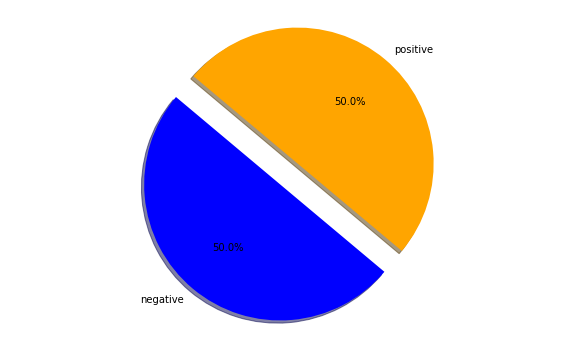

In [388]:
colors = [ 'blue','orange']
explode = (0, 0.2)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['target'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

Berdasarkan visualisasi tersebut terlihat bahwa data dalam kondisi 'balanced' yang artinya target class atau klasifikasi yang dilakukan sudah seimbang. Jumlah antara sentiment negative dan sentiment positive memiliki proporsi yang sama yaitu 50%.

#### Sampling Data

Ukuran data yang terlalu besar mengakibatkan proses analysis menjadi lama. Oleh karena itu, saya membatasi ukuran data yang saya gunakan dengan menggunakan metode random sampling berstrata. 

1.   Bagi data menjadi jumlah class 'target', karena pada data ini kelas target ada dua maka saya membagi data menjadi dua bagian, yakni datapositive dan datanegative.
2.   Kemudian untuk setiap data saya ambil 15.000 baris
3.   Kemudian menggabungkan kedua data tersebut menjadi datatweet yang selanjutnya digunakan untuk proses analysis.



Memisah data menjadi **datapositive** (tweet yang memiliki target 'positive') dan **datanegative** (tweet yang memiliki target 'negative').

In [0]:
datapositive=data[data['target']=='positive']
datanegative=data[data['target']=='negative']

Dimensi ukuran **datapositive** dan **datanegative**.

In [390]:
datapositive.shape

(798250, 2)

In [391]:
datanegative.shape

(798503, 2)

Dari informasi diatas, datapositive memiliki jumlah baris 798.250 baris dan datanegative memiliki jumlah baris 798503 baris. Maka, ukuran datapositive dan datanegative tidak terlalu beda jauh.

**Random sampling**

Sampling ini dilakukan dengan mengambil random terhadap datapositive dan datanegative sejumlah 15.000 baris sehingga nantinya data tweet yang akan dianalisis memiliki ukuran 30000 baris.

In [0]:
datapositive= datapositive.sample(n=15000, random_state=1) 

In [0]:
datanegative= datanegative.sample(n=15000, random_state=1) 

In [0]:
#Menggabungkan datapositive dan datanegative
frames=[datapositive, datanegative]
datatweet=pd.concat(frames)

In [395]:
datatweet.shape

(30000, 2)

#### Drop Duplicate Tweet

Pada tahap ini dilakukan penghapusan duplicate tweet pada data. Tujuannya agar tidak ada redundant data pada data tweet.

In [0]:
#drop duplicate tweet 
g_unique = set()
for item in datatweet['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    datatwiter = pd.DataFrame(tweet,columns = ['text'])

## Data Preprocessing

### Basic Text Preprocessing

#### Lower Casing

Pada step ini dilakukan 'lower casing' kata pada tweet agar data yang sama akan dideteksi menjadi satu kelompok. 

In [397]:
datatwiter['text'] = datatwiter['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
datatwiter['text'].head()

0    oh moma likes shannon brown did u c him showca...
1    im watching the google wave preview cause idk ...
2    hmmm possibly tempting ya know i have never ev...
3                                 am going to the shop
4                                  its nearly all gone
Name: text, dtype: object

#### Punctuation removal

Pada langkah ini akan dilakukan menghapus semua tanda baca dari string. Jika karakter adalah tanda baca, itu akan digantikan dengan string kosong.

In [398]:
datatwiter['text'] = datatwiter['text'].str.replace('[^\w\s]','')  #replace w=word dan s=number to space
datatwiter.head()

,text
0,oh moma likes shannon brown did u c him showca...
1,im watching the google wave preview cause idk ...
2,hmmm possibly tempting ya know i have never ev...
3,am going to the shop
4,its nearly all gone


#### Stopward Removal

Langkah ini dilakukan penghapusan preposisi (kata depan) pada teks tweet. Penghapusan ini berarti bahwa kata depan akan diabaiakan dalam proses berikutnya.

In [399]:
stop = stopwords.words('english')
datatwiter['text'] = datatwiter['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
datatwiter['text'].head(10)

0    oh moma likes shannon brown u c showcase tongu...
1    im watching google wave preview cause idk hell...
2    hmmm possibly tempting ya know never ever ever...
3                                           going shop
4                                          nearly gone
5                   bon tothom bon cap de setmana qevc
6    yw sorry goin thru fair kids live play b happy...
7                             kita happy mother day gf
8              yay closed perry home georgetown whooaa
9                       went qdoba veggie burrito good
Name: text, dtype: object

 #### Frequent words removal

Langkah ini dilakukan untuk  mengidentifikasi kata yang sering muncul dalam teks. Keberadaan kata tersebut tidak penting karena hanya mengulangi sehingga perlu dilakukan penghapusan. Namun, dalam beberapa kasus, kata-katanya diulang karena penting sehingga langkah berikutnya dapat dihapus atau dipertahankan.

In [400]:
#Counting frequent word
freq = pd.Series(' '.join(datatwiter['text']).split()).value_counts()[:10]
freq

day      1636
good     1629
like     1518
get      1477
go       1429
today    1279
going    1244
work     1181
got      1158
lol      1115
dtype: int64

Karena kata yang sering muncul adalah kata-kata tentang keluhan atau kegiatan yang ditweet oleh netizen seperti kata 'good', 'work', 'today'. Maka, selanjutnya saya memutuskan untuk tidak menghapus kata tersebut.

#### Rare words removal

Langkah ini mengidentifikasi kata yang tidak sering muncul.

In [401]:
rare_word = pd.Series(' '.join(datatwiter['text']).split()).value_counts()[-10:]
rare_word

commuters      1
ieyecaptain    1
ties           1
posst          1
dangling       1
mainz          1
nostri         1
decades        1
knack          1
ayurveda       1
dtype: int64

Karena kata jarang muncul dalam teks Tweet, maka langkah selanjutnya adalah melakukan penghapusan.

In [402]:
rare_word = list(rare_word.index)
datatwiter['text'] = datatwiter['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
datatwiter['text'].head()

0    oh moma likes shannon brown u c showcase tongu...
1    im watching google wave preview cause idk hell...
2    hmmm possibly tempting ya know never ever ever...
3                                                 shop
4                                          nearly gone
Name: text, dtype: object

#### Spelling Corection

Dalam langkah ini dilakukan ejaan koreksi, sehingga kata yang tidak ditulis dengan benar akan berubah menjadi kata dengan tulisan yang benar dalam kata bahasa Inggris.

In [403]:
datatwiter['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    oh myoma likes cannon brown u c showcase tongu...
1      in watching goose wave review cause ink hell ah
2    mmm possibly tempting a know never ever ever p...
3                                                 shop
4                                          nearly gone
Name: text, dtype: object

#### Tokenization

Diberi urutan karakter dan unit dokumen yang ditetapkan, tokenisasi adalah tugas memotong itu menjadi potongan-potongan, disebut token, mungkin pada saat yang sama membuang karakter tertentu, seperti tanda baca.

In [404]:
#nltk.download('punkt')
TextBlob(datatwiter['text'][1]).words

WordList(['im', 'watching', 'google', 'wave', 'preview', 'cause', 'idk', 'hell', 'ahh'])

#### Stemming

Pada langkah ini dilakukan pengubahan kata ke kata original. Sesuai kamus bahasa inggris.

In [0]:
st = PorterStemmer()
datatwiter['text'] = datatwiter['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#### Lematization

Dalam langkah ini, proses pengelompokan bersama-sama bentuk kata yang berbeda sehingga mereka dapat dianalisis sebagai satu item. Sebagai contoh dari kata cried, crying, kemudian cry, kata ini akan menjadi lematisasi untuk ' CR '.

In [406]:
from textblob import Word
nltk.download('wordnet')
datatwiter['text'] = datatwiter['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
datatwiter['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    oh moma like shannon brown u c showcas tongu t...
1        im watch googl wave preview caus idk hell ahh
2    hmmm possibl tempt ya know never ever ever pla...
3                                                 shop
4                                          nearli gone
Name: text, dtype: object

In [407]:
datatwiter.head()

,text
0,oh moma like shannon brown u c showcas tongu t...
1,im watch googl wave preview caus idk hell ahh
2,hmmm possibl tempt ya know never ever ever pla...
3,shop
4,nearli gone


In [408]:
datatwiter.shape

(29661, 1)

## WordCloud

**Wordcloud** adalah representasi visual dari data teks, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas. Selain itu, **Wordcloud** cara yang bagus untuk memvisualisasikan sentimen, menguasai teks yang besar, dan mengubah artikel yang menjemukan menjadi karya seni.


Pada tahap ini akan dibuat 'wordcloud' dari data teks tweet diatas setelah dilakukan text preprocessing.

#### Wordcloud Text

In [0]:
wordc = "".join(datatwiter.text.values)

In [0]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", contour_width = 2, contour_color = "green", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

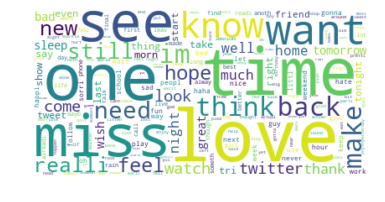

In [411]:
create_word_cloud(wordc)

#### Wordcloud each target

In [0]:
#define positive and not negative
positive = datatweet.loc[datatweet['target'] == "positive"]
negative  = datatweet.loc[datatweet['target'] == "negative"]

In [0]:
#merge all the happy comments into one paragraph
all_target_negative = "".join(negative.text.values)
all_target_positive = "".join(positive.text.values)

In [0]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", contour_width = 2, contour_color = "red", max_words = 100, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#### Wordcloud Positive

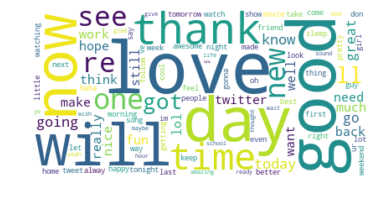

In [415]:
#positive
create_word_cloud(all_target_positive)

#### Wordcloud Negative

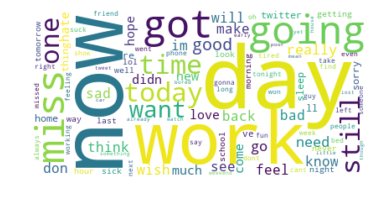

In [416]:
#negative
create_word_cloud(all_target_negative)

## Feature Extraction

Feature Extraction berfungsi untuk pembuatan model dimana nanti akan dibentuk menjadi count vectorizer dan TF-IDF Vectorizer.

**1. Count Vectorizer**

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')

**2. TF-IDF Vectorizer**

In [0]:
tfidf = TfidfVectorizer(stop_words='english')

## Modeling

Pada tahap ini akan dilakukan modeling, menggunakan algorithma Logistic Regression dan Naive-Bayes Classifier. Sebelumnya, data akan ditransformasi ke count vectorizer dan TF-IDF Vectorizer. Selanjutnya, nanti akan dilakukan pemilihan model terbaik menggunakan ukuran kebaikan model Recall dan Precision.

In [0]:
#Inizialize data
X = datatweet['text']
y = datatweet['target']

In [0]:
#countvectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

#tfidf vectorizer
X_tfidf = tfidf.fit_transform(X)

In [0]:
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

### Logistic Regression

#### Countvectorizer

In [422]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### TDIFVectorizer

In [423]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Measurement of Model

In [424]:
# using count vectorizer
print("______________ Countvectorizer ______________")

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 88.38% & 74.50%
Precision train & test  : 88.38% & 74.50%
F1 Score train & test   : 88.38% & 74.50%


In [425]:
# using count TDIF vectorizer
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 84.27% & 74.97%
Precision train & test  : 84.27% & 74.97%
F1 Score train & test   : 84.27% & 74.50%


### Naive Bayes Classifier

#### Countvectorizer

In [0]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)

#### TFIDFVectorizer

In [0]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)

#### Measurement of Model

In [428]:
# find model evaluation for naive bayes
# using count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 86.48% & 74.72%
Precision train & test  : 86.48% & 74.72%
F1 Score train & test   : 86.48% & 74.72%


In [429]:
# using count vectorizer
print("______________ TF-IDF ______________") #menggunakan tf-idf lebih baik


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 86.90% & 74.27%
Precision train & test  : 86.90% & 74.27%
F1 Score train & test   : 86.90% & 74.72%


## Best Model

Setelah membentuk kedua model diatas selanjutnya akan dipilih model terbaik dengan melihat nilai Recall, Precision untuk data test dan train. Model yang baik adalah model yang memiliki selisih measure/ukuran kebaikan model antara train dan test tidak terlalu jauh.

Sehingga, berdasarkan dari model tersebut model yang paling baik adalah model TF-IDF Vectorizer Logistic Regression yang memiliki selisih nilai kebaikan model paling sedikit. Sebagai berikut:

* Recall train & test     : 84.27% & 74.97%
* Precision train & test  : 84.27% & 74.97%
* F1 Score train & test   : 84.27% & 74.50%

## Conclusion

- Sentiment Analysis adalah salah satu bidang dari Natural Languange Processing (NLP) yang membangun sistem untuk mengenali dan mengekstraksi opini dalam bentuk teks. Metode ini mengklasifikasikan 'text' atau opini menjadi sebuah hasil opini yang bersifat positive atau negative.
- Pada case ini digunakan data tweet dari twitter.
- Ukuran data untuk proses analysis dilakukan dengan random sampling.
- Pada saat klasifikasi digunakan dua algorithma yaitu Logistic Regression dan Naive-Bayes Classifier.
- Berdasarkan hasil analysis disimpulkan metode yang baik untuk mengklasifikasikan tweet tersebut adalah metode transformasi TF-IDF mengggunakan algorithma Regresi Logistik. Dimana algorithma ini memiliki nilai Re-call sebesar 84.27% yang artinya tingkat keberhasilan algorithma tersebut mengklasifikasikan dengan benar adalah sebesar 84.27% pada data training dan 74.97% untuk data testing. Sedangkan, untuk precision dihasilkan adalah 84.27% juga yang artinya tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh algorithma sebesar 84.27%.